Spotify Streaming data from March 9th,2022 - April 23rd, 2022

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [27]:
def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
songs=pd.read_excel("StreamingHistory.xlsx")

In [28]:
songs.count()

record              0
endTime          2608
day              2608
wkday            2608
time             2608
artistName       2608
trackName        2608
milisecPlayed    2608
dtype: int64

In [29]:
print(songs.shape)

(2608, 8)


Dropped the 'record' column because they were not useful. It did not have any values in the column

In [30]:
# Remove column name 'record'
songs_clean=songs.drop(['record'], axis = 1)

In [31]:
print(songs_clean.shape)

(2608, 7)


Here, I am only concerned with the songs that were listened to for more than 1 minute(>60,0000 miliseconds). I would consider songs that were listened to for less than 1 minute to be skips or the individual did not like the song enough to listen to the whole thing.

In [32]:
#Drop songs that are listened to for less than 60,000 miliseconds
songs_filtered = songs_clean[songs_clean['milisecPlayed'] >= 60000]

In [33]:
# Print the new dataframe
print(songs_filtered)

               endTime         day wkday   time     artistName  \
0     2022-03-09 15:00  2022-03-09   Wed  15:00           LÉON   
1     2022-03-09 15:03  2022-03-09   Wed  15:03           LÉON   
2     2022-03-09 15:06  2022-03-09   Wed  15:06           LÉON   
3     2022-03-09 15:09  2022-03-09   Wed  15:09           LÉON   
5     2022-03-10 03:20  2022-03-10   Thu  03:20           LÉON   
...                ...         ...   ...    ...            ...   
2603  2022-04-23 10:49  2022-04-23   Sat  10:49        JORDANN   
2604  2022-04-23 10:52  2022-04-23   Sat  10:52  Lennon Stella   
2605  2022-04-23 10:56  2022-04-23   Sat  10:56          BENEE   
2606  2022-04-23 11:01  2022-04-23   Sat  11:01        Kimchii   
2607  2022-04-23 11:05  2022-04-23   Sat  11:05        Glassio   

                            trackName  milisecPlayed  
0                    Wishful Thinking         243203  
1                              Soaked         212262  
2                   Fade Into A Dream     

In [34]:
# Print the shape of the dataframe
print(songs_filtered.shape)

(2127, 7)


In [35]:
# iterating the columns
for col in songs.columns:
    print(col)

record
endTime
day
wkday
time
artistName
trackName
milisecPlayed


What day of the week most songs are streamed

In [36]:
#define days and time muic is played
df = pd.DataFrame(songs_filtered)
  
# select two columns
df[['day','wkday', 'milisecPlayed']]

,day,wkday,milisecPlayed
0,2022-03-09,Wed,243203
1,2022-03-09,Wed,212262
2,2022-03-09,Wed,171901
3,2022-03-09,Wed,205953
5,2022-03-10,Thu,200715
...,...,...,...
2603,2022-04-23,Sat,220146
2604,2022-04-23,Sat,181533
2605,2022-04-23,Sat,240946
2606,2022-04-23,Sat,340985


In [37]:
monday=df.loc[df['wkday'] =='Mon','milisecPlayed'].sum()
mondaysongs=monday/60000
mondaysongs

1304.7198666666666

In [38]:
tuesday=df.loc[df['wkday'] =='Tue','milisecPlayed'].sum()
tuesdaysongs=tuesday/60000
tuesdaysongs

852.7872333333333

In [39]:
wednesday=df.loc[df['wkday'] =='Wed','milisecPlayed'].sum()
wednesdaysongs=wednesday/60000
wednesdaysongs

709.7929666666666

In [40]:
thursday=df.loc[df['wkday'] =='Thu','milisecPlayed'].sum()
thursdaysongs=thursday/60000
thursdaysongs

870.2789833333334

In [41]:
friday=df.loc[df['wkday'] =='Fri','milisecPlayed'].sum()
fridaysongs=friday/60000
fridaysongs

1582.42215

In [42]:
saturday=df.loc[df['wkday'] =='Sat','milisecPlayed'].sum()
saturdaysongs=saturday/60000
saturdaysongs

1384.6175833333334

In [43]:
sunday=df.loc[df['wkday'] =='Sun','milisecPlayed'].sum()
sundaysongs=sunday/60000
sundaysongs

1038.0428833333333

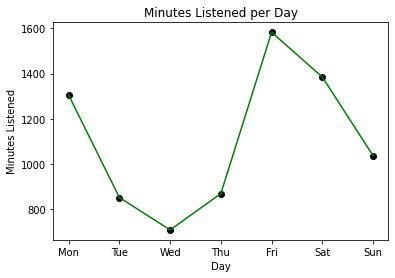

In [51]:
day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
min_listened = [1304.7198666666666,852.7872333333333,709.7929666666666,
                870.2789833333334,1582.42215,1384.6175833333334,
                1038.0428833333333]
plt.plot(day, min_listened, color='Green')
plt.scatter(day, min_listened, color='Black')
plt.xlabel('Day')
plt.ylabel('Minutes Listened')
plt.title('Minutes Listened per Day')
plt.show()

Findings: Here we can see that the user listened to music the most on Friday and the least on Wednesdays. With this information, this user should have more new music ads on Friday because the user is more likely to see it! If Spotify wants to encourage the user to use the app more during the lower listened to days, they should auto play more 'low-fi' or 'chill' music. This user seems to be busier Tuesday, Wednesday and Thursday so they may not want over-baring music when they are focused.

Most Streamed Song 

In [45]:
trackName=pd.value_counts(songs_filtered['trackName'])
print(trackName)

muse                                            42
Love Me Like I Am                               38
Look Like That                                  35
scorton's creek - re-imagined by filous         33
Big Energy                                      31
                                                ..
Situations                                       1
Upside Down                                      1
I Can't Help Myself (Sugar Pie, Honey Bunch)     1
Remedy                                           1
Are You Having Fun Without Me?                   1
Name: trackName, Length: 909, dtype: int64


In [46]:
top10=trackName.head(10)
print(top10)

muse                                       42
Love Me Like I Am                          38
Look Like That                             35
scorton's creek - re-imagined by filous    33
Big Energy                                 31
All My Heroes                              28
Soaked                                     26
Lift You Up                                26
N/S                                        22
Less Than Zero                             22
Name: trackName, dtype: int64


Text(0, 0.5, 'Count')

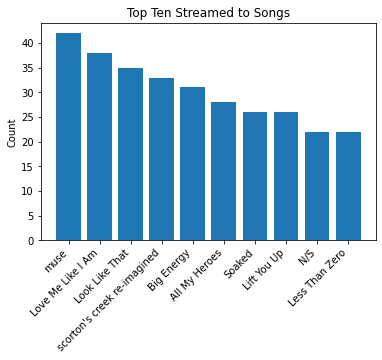

In [53]:
trackName = ['muse','Love Me Like I Am','Look Like That','scorton\'s creek re-imagined',
             'Big Energy','All My Heroes','Soaked','Lift You Up','N/S','Less Than Zero'] 
Count=[42,38,35,33,31,28,26,26,22,22]
plt.bar(trackName,Count)  
plt.xticks(rotation=45, ha='right')
figsize=(20,20)
plt.title('Top Ten Streamed to Songs')
plt.ylabel('Count')

Findings: Most listened to song is 'muse' so Spotify should target music that is in the same genre or artist for this user

Most streamed artist

In [48]:
Artists=pd.value_counts(songs_filtered['artistName'])
print(Artists)

LÉON                      246
Florence + The Machine    130
for KING & COUNTRY         81
Tim Atlas                  61
MisterWives                45
                         ... 
Wrabel                      1
Bruno Major                 1
Wild Rivers                 1
James Bay                   1
Kimchii                     1
Name: artistName, Length: 394, dtype: int64


In [49]:
Artists.head(20)

LÉON                      246
Florence + The Machine    130
for KING & COUNTRY         81
Tim Atlas                  61
MisterWives                45
Ariana Grande              39
The Weeknd                 39
COIN                       38
Isaac Dunbar               35
Latto                      32
Ellie Goulding             28
John Mayer                 27
Thomas Newman              26
Justin Timberlake          26
Lana Del Rey               24
Litany                     23
Stray Kids                 22
Bad Suns                   22
Post Malone                22
The Morning Toast          20
Name: artistName, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


Text(0, 0.5, 'Count')

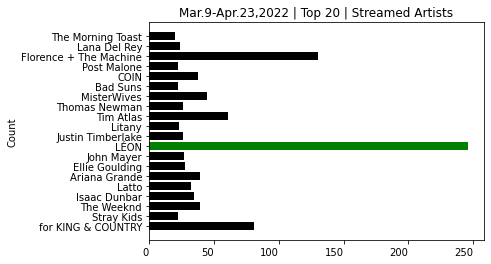

In [83]:
artistsName = ['for KING & COUNTRY','Stray Kids',
'The Weeknd','Isaac Dunbar','Latto','Ariana Grande',
'Ellie Goulding','John Mayer','LÉON','Justin Timberlake',
'Litany','Tim Atlas','Thomas Newman','MisterWives','Bad Suns','COIN',
'Post Malone','Florence + The Machine','Lana Del Rey','The Morning Toast'] 
Count=[81,22, 39,35,32,39,28,27,246,26,23,61,26,45,22,38,22,130,24,20]
plt.barh(artistsName, Count, color='kkkkkkkkgkkkkkkkkkkkk')
figsize=(20,20)
plt.xticks(ha='right')
plt.title('Mar.9-Apr.23,2022 | Top 20 | Streamed Artists')
plt.ylabel('Count')

Findings: LEON is the most listened to artists so Spotify should target more of her songs or at least auto-play LEON songs when a playlists is finished or songs are not queued